In [4]:
%matplotlib notebook
import os
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import scipy.stats as ss  
from numpy import linalg as LA
from matplotlib import pyplot as plt,cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel,WhiteKernel)

In [5]:
pltlinestyles = [ (0, (1, 5)),(0, (3, 5, 1, 5)),(0, (5, 5)),(0, ()), (0, (3, 1, 1, 1, 1, 1)), 
        (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (3, 10, 1, 10, 1, 10)),(0, (1, 10)), 
        (0, (5, 1)),  (0, (3, 1, 1, 1)),(0, (3, 5, 1, 5, 1, 5)),  (0, (1, 1))  ]*10

pltmarkers   = ['o','v','s','d','+','*']
ordinal      = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
pltcolors    = plt.rcParams['axes.prop_cycle'].by_key()['color']
figsize      = (4*1.5,3*1.5)
pltlinewidth = 1.0
return_period= [1,5,10]
prob_fails   = [1/(p *365.25*24*3600/1000) for p in return_period]
pf1year, pf5year, pf10year = prob_fails
n_mcs = 1.0/np.array(prob_fails)*100
print(n_mcs)

[ 3155760. 15778800. 31557600.]


In [6]:
data = np.load('Kvitebjorn_EC_P50.npy')
print(data.shape)

(4, 1000)


In [12]:
import scipy.io
mdic = {'data':data}
scipy.io.savemat('Kvitebjorn_EC_P50.mat', mdic)

<IPython.core.display.Javascript object>


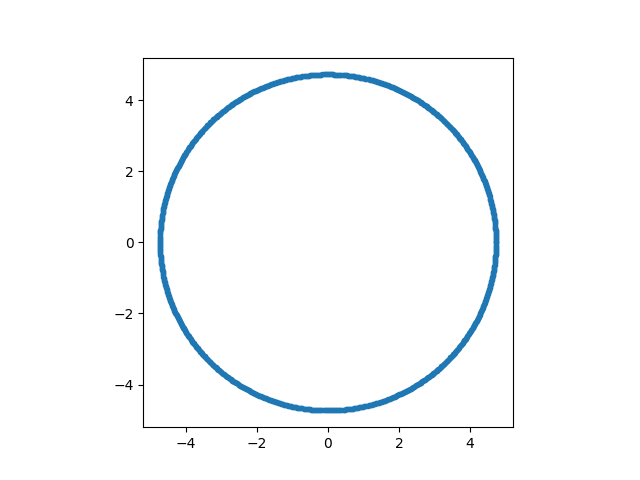

<IPython.core.display.Javascript object>


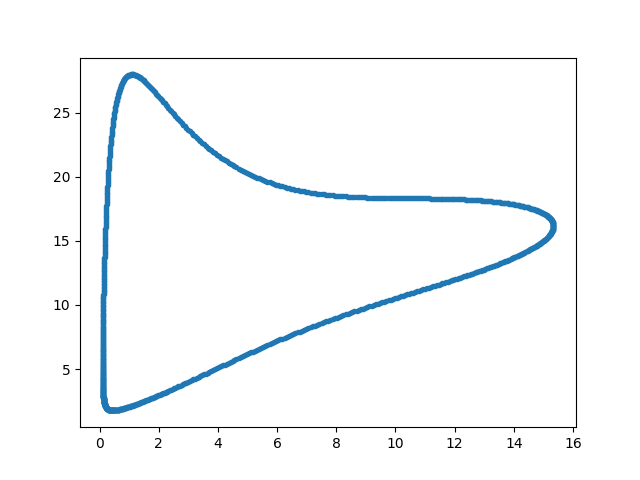

In [10]:
plt.figure()
plt.plot(data[0], data[1],'.')
plt.gca().set_aspect('equal', adjustable='box')
plt.figure()
plt.plot(data[2],data[3],'.')